In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CODTECH Big Data Task") \
    .master("local[*]") \
    .getOrCreate()

print("Spark Started Successfully!")
print("Spark Version:", spark.version)


Spark Started Successfully!
Spark Version: 4.1.1


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[1]") \
    .appName("CODTECH Task") \
    .config("spark.ui.showConsoleProgress", "false") \
    .getOrCreate()

print("Spark Started Successfully")
print("Spark Version:", spark.version)


Spark Started Successfully
Spark Version: 4.1.1


In [3]:
import os
os.environ["PYSPARK_SUBMIT_ARGS"] = "--driver-memory 1g pyspark-shell"


In [4]:
import os
os.environ["PYSPARK_SUBMIT_ARGS"] = "--driver-memory 1g pyspark-shell"


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[1]") \
    .appName("CODTECH Task") \
    .config("spark.ui.showConsoleProgress", "false") \
    .getOrCreate()

print("Spark Started Successfully")
print("Spark Version:", spark.version)


Spark Started Successfully
Spark Version: 4.1.1


In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("CODTECH Big Data Task") \
    .getOrCreate()

print("Spark Started Successfully")
print("Spark Version:", spark.version)


Spark Started Successfully
Spark Version: 4.1.1


In [7]:
df = spark.read.parquet("dataset/yellow_tripdata_2023-01.parquet")
df.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|                 N|         161|         141|           2|        9.3|  1.0|    0.5|       0.

In [8]:
df.printSchema()
df.count()


root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



3066766

In [9]:
from pyspark.sql.functions import col, sum

df.select(
    sum(col("passenger_count").isNull().cast("int")).alias("missing_passenger_count"),
    sum(col("trip_distance").isNull().cast("int")).alias("missing_trip_distance"),
    sum(col("fare_amount").isNull().cast("int")).alias("missing_fare_amount"),
    sum(col("total_amount").isNull().cast("int")).alias("missing_total_amount")
).show()


+-----------------------+---------------------+-------------------+--------------------+
|missing_passenger_count|missing_trip_distance|missing_fare_amount|missing_total_amount|
+-----------------------+---------------------+-------------------+--------------------+
|                  71743|                    0|                  0|                   0|
+-----------------------+---------------------+-------------------+--------------------+



In [10]:
clean_df = df.filter(
    (col("trip_distance") > 0) &
    (col("fare_amount") > 0) &
    (col("total_amount") > 0)
)

print("Original rows:", df.count())
print("Clean rows:", clean_df.count())


Original rows: 3066766
Clean rows: 2998382


In [11]:
clean_df.select("trip_distance", "fare_amount", "total_amount").describe().show()


+-------+------------------+-----------------+------------------+
|summary|     trip_distance|      fare_amount|      total_amount|
+-------+------------------+-----------------+------------------+
|  count|           2998382|          2998382|           2998382|
|   mean|3.8891378250002155|18.56341741979455|27.358837753091013|
| stddev| 249.8220090496604|16.98789187523885| 21.28676174185639|
|    min|              0.01|             0.01|              1.01|
|    max|         258928.15|           1160.1|            1169.4|
+-------+------------------+-----------------+------------------+



In [12]:
clean_df.select("trip_distance", "fare_amount", "total_amount") \
    .orderBy(col("trip_distance").desc()) \
    .show(10)


+-------------+-----------+------------+
|trip_distance|fare_amount|total_amount|
+-------------+-----------+------------+
|    258928.15|      13.65|       21.18|
|    225987.37|      56.49|       72.59|
|    187872.33|      14.02|       21.62|
|    116439.71|      13.22|       20.22|
|     85543.66|       39.9|        51.8|
|     76886.52|      21.49|       30.59|
|      52042.3|       14.4|       20.24|
|     33205.32|      12.87|       20.24|
|     16562.61|      28.87|        37.8|
|     14952.38|      14.93|       22.72|
+-------------+-----------+------------+
only showing top 10 rows


In [13]:
clean_df.groupBy("passenger_count") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()


+---------------+-------+
|passenger_count|  count|
+---------------+-------+
|            1.0|2213563|
|            2.0| 443702|
|            3.0| 104412|
|           NULL|  64201|
|            4.0|  52082|
|            0.0|  49953|
|            5.0|  42456|
|            6.0|  28001|
|            8.0|      7|
|            7.0|      5|
+---------------+-------+



In [14]:
clean_df.groupBy("payment_type") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()


+------------+-------+
|payment_type|  count|
+------------+-------+
|           1|2390461|
|           2| 517040|
|           0|  64201|
|           4|  16535|
|           3|  10145|
+------------+-------+



In [15]:
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
import matplotlib.pyplot as plt
import pandas as pd


In [17]:
import sys
print(sys.executable)


C:\Users\tanvi\AppData\Local\Programs\Python\Python311\python.exe


In [18]:
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

print("Matplotlib and Pandas working!")


Matplotlib and Pandas working!


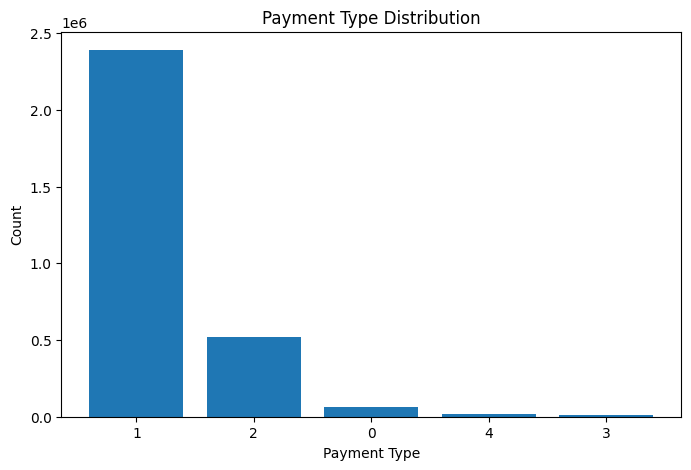

In [20]:
from pyspark.sql.functions import col

payment_df = clean_df.groupBy("payment_type").count().orderBy(col("count").desc())

payment_pd = payment_df.toPandas()

plt.figure(figsize=(8,5))
plt.bar(payment_pd["payment_type"].astype(str), payment_pd["count"])
plt.title("Payment Type Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()


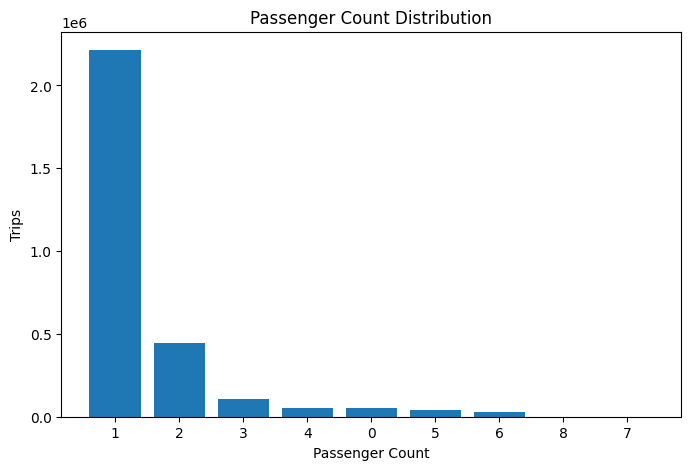

In [21]:
from pyspark.sql.functions import col

passenger_df = clean_df.filter(col("passenger_count").isNotNull()) \
    .groupBy("passenger_count").count() \
    .orderBy(col("count").desc())

passenger_pd = passenger_df.toPandas()

# Convert passenger_count to int
passenger_pd["passenger_count"] = passenger_pd["passenger_count"].astype(int)

plt.figure(figsize=(8,5))
plt.bar(passenger_pd["passenger_count"].astype(str), passenger_pd["count"])
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Trips")
plt.show()


In [22]:
pickup_df = clean_df.groupBy("PULocationID").count().orderBy(col("count").desc())

pickup_df.show(10)


+------------+------+
|PULocationID| count|
+------------+------+
|         132|154231|
|         237|146152|
|         236|136648|
|         161|133380|
|         186|107633|
|         162|103821|
|         142| 98677|
|         230| 97109|
|         138| 88022|
|         170| 86844|
+------------+------+
only showing top 10 rows


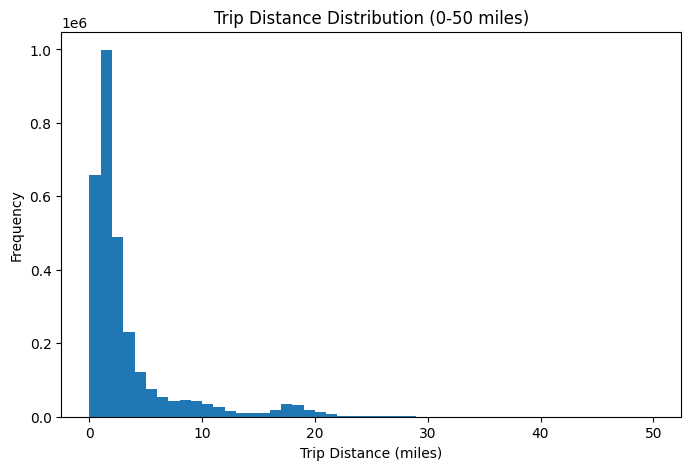

In [23]:
clean_df = clean_df.filter(col("trip_distance") < 50)

distance_pd = clean_df.select("trip_distance").toPandas()

plt.figure(figsize=(8,5))
plt.hist(distance_pd["trip_distance"], bins=50)
plt.title("Trip Distance Distribution (0-50 miles)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()


In [24]:
payment_total_df = clean_df.groupBy("payment_type") \
    .avg("total_amount") \
    .orderBy(col("avg(total_amount)").desc())

payment_total_df.show()


+------------+------------------+
|payment_type| avg(total_amount)|
+------------+------------------+
|           0| 29.81938536600541|
|           1|28.119825703366317|
|           4|23.896185492165063|
|           2|23.564973711398252|
|           3|22.131589743589654|
+------------+------------------+



In [25]:
from pyspark.sql.functions import hour

hour_df = clean_df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))

hour_count_df = hour_df.groupBy("pickup_hour") \
    .count() \
    .orderBy(col("count").desc())

hour_count_df.show()


+-----------+------+
|pickup_hour| count|
+-----------+------+
|         18|211537|
|         17|205058|
|         15|192087|
|         16|191442|
|         19|188955|
|         14|187473|
|         13|174821|
|         12|166235|
|         20|162317|
|         21|158308|
|         11|151005|
|         22|144292|
|         10|140694|
|          9|128434|
|          8|114462|
|         23|111771|
|          7| 84864|
|          0| 82713|
|          1| 58097|
|          6| 42491|
+-----------+------+
only showing top 20 rows


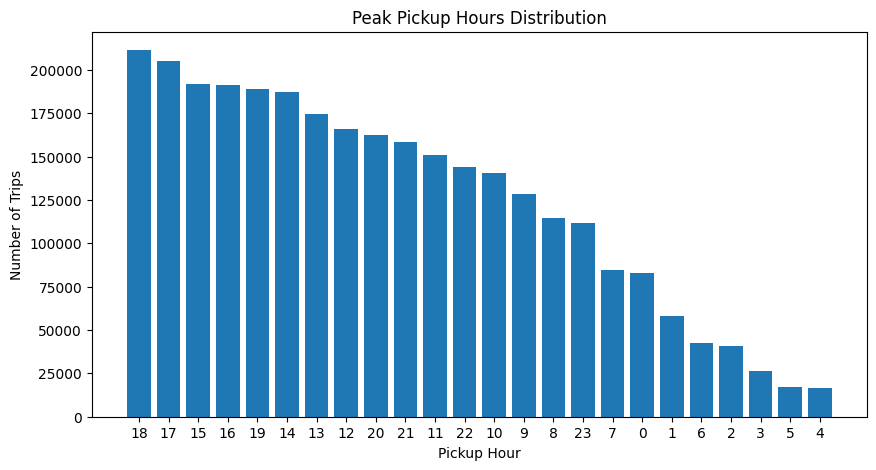

In [26]:
hour_pd = hour_count_df.toPandas()

plt.figure(figsize=(10,5))
plt.bar(hour_pd["pickup_hour"].astype(str), hour_pd["count"])
plt.title("Peak Pickup Hours Distribution")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.xticks(rotation=0)
plt.show()


In [27]:
dropoff_df = clean_df.groupBy("DOLocationID") \
    .count() \
    .orderBy(col("count").desc())

dropoff_df.show(10)


+------------+------+
|DOLocationID| count|
+------------+------+
|         236|144584|
|         237|130720|
|         161|114309|
|         230| 88048|
|         170| 87364|
|         239| 86900|
|         142| 86724|
|         141| 86430|
|         162| 81404|
|          48| 75755|
+------------+------+
only showing top 10 rows


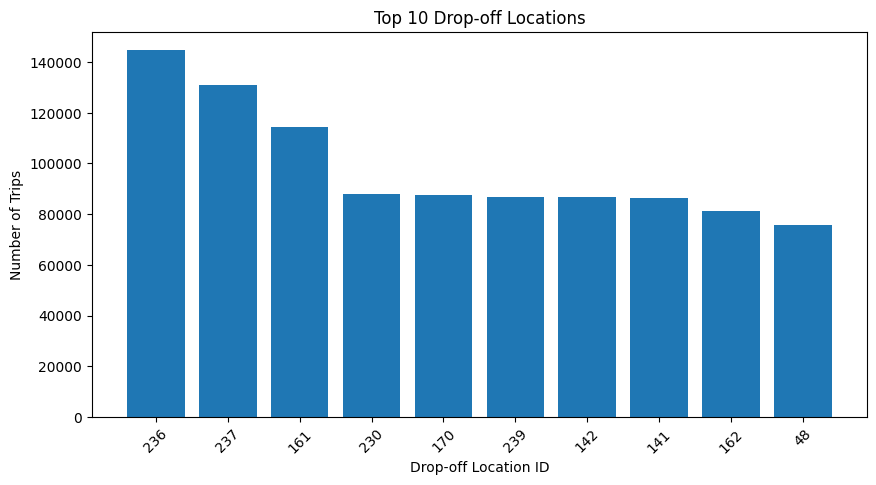

In [28]:
dropoff_top10 = dropoff_df.limit(10)
dropoff_pd = dropoff_top10.toPandas()

plt.figure(figsize=(10,5))
plt.bar(dropoff_pd["DOLocationID"].astype(str), dropoff_pd["count"])
plt.title("Top 10 Drop-off Locations")
plt.xlabel("Drop-off Location ID")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()


In [29]:
clean_df.selectExpr(
    "avg(trip_distance) as avg_trip_distance",
    "avg(fare_amount) as avg_fare_amount",
    "avg(total_amount) as avg_total_amount"
).show()


+------------------+------------------+------------------+
| avg_trip_distance|   avg_fare_amount|  avg_total_amount|
+------------------+------------------+------------------+
|3.4140179739166148|18.534660373160207|27.327249536372353|
+------------------+------------------+------------------+



In [30]:
import os

os.environ["HADOOP_HOME"] = r"C:\hadoop"
os.environ["hadoop.home.dir"] = r"C:\hadoop"
os.environ["PATH"] += os.pathsep + r"C:\hadoop\bin"


In [31]:
import os
from pyspark.sql import SparkSession

# Hadoop path
os.environ["HADOOP_HOME"] = r"C:\hadoop"
os.environ["hadoop.home.dir"] = r"C:\hadoop"
os.environ["PATH"] += os.pathsep + r"C:\hadoop\bin"

# Disable Hadoop native IO completely (Windows Fix)
os.environ["JAVA_TOOL_OPTIONS"] = "-Djava.library.path=C:\\hadoop\\bin"

spark = SparkSession.builder \
    .appName("TaxiDataAnalysis") \
    .config("spark.hadoop.io.native.lib.available", "false") \
    .config("spark.hadoop.util.shell.disable.native", "true") \
    .config("spark.sql.parquet.output.committer.class",
            "org.apache.parquet.hadoop.ParquetOutputCommitter") \
    .config("spark.sql.sources.commitProtocolClass",
            "org.apache.spark.sql.execution.datasources.SQLHadoopMapReduceCommitProtocol") \
    .getOrCreate()

print("Spark started successfully!")

# Save output
clean_df.write.mode("overwrite").parquet("output/cleaned_taxi_data.parquet")
print("Saved successfully!")


Spark started successfully!
Saved successfully!


In [33]:
clean_df.write.mode("overwrite").parquet("output/cleaned_taxi_data.parquet")
print("Saved successfully!")


Saved successfully!


In [34]:
import os
print(os.listdir("output"))


['cleaned_taxi_data.parquet']


In [35]:
df_check = spark.read.parquet("output/cleaned_taxi_data.parquet")
df_check.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|                 N|         161|         141|           2|        9.3|  1.0|    0.5|       0.

In [36]:
clean_df.write.mode("overwrite").option("header", "true").csv("output/cleaned_taxi_data_csv")
print("CSV saved successfully!")


CSV saved successfully!


In [37]:
import os
print(os.listdir("output"))


['cleaned_taxi_data.parquet', 'cleaned_taxi_data_csv']


In [38]:
import glob
import shutil

csv_files = glob.glob("output/cleaned_taxi_data_csv/part-*.csv")
shutil.copy(csv_files[0], "output/cleaned_taxi_data_final.csv")

print("Single CSV file created: cleaned_taxi_data_final.csv")


Single CSV file created: cleaned_taxi_data_final.csv


In [39]:
import os
print(os.listdir("output"))


['cleaned_taxi_data.parquet', 'cleaned_taxi_data_csv', 'cleaned_taxi_data_final.csv']


In [40]:
import os
import glob
import shutil

# Delete old final file if exists
final_path = "output/cleaned_taxi_data_final.csv"
if os.path.exists(final_path):
    os.remove(final_path)

# Get the correct part file (largest one)
csv_parts = glob.glob("output/cleaned_taxi_data_csv/part-*.csv")

largest_file = max(csv_parts, key=os.path.getsize)

shutil.copy(largest_file, final_path)

print("Correct CSV created:", final_path)
print("Copied from:", largest_file)
print("File size:", os.path.getsize(final_path), "bytes")


Correct CSV created: output/cleaned_taxi_data_final.csv
Copied from: output/cleaned_taxi_data_csv\part-00005-9bc7cd2b-c526-4e2c-b1cc-369944aa54c1-c000.csv
File size: 341742949 bytes
